In [1]:
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
#import scipy.stats as stats

In [2]:
with open(f'pickle/faceflips.pkl', 'rb') as f:
    random_faceflips = pickle.load(f)
with open(f'pickle/styleflips.pkl', 'rb') as f:
    random_styleflips = pickle.load(f)
with open(f'pickle/alldistances.pkl', 'rb') as f:
    random_alldistances = pickle.load(f)
with open(f'pickle/allcrossings.pkl', 'rb') as f:
    random_allcrossings = pickle.load(f)

In [13]:
strategies=['octoradial','portByAngle','hausdorff','hausdorffspoke','hausdorffcirc','uniform','uniformspoke','uniformcirc','oneBend']
alllabels=['octoradial','portByAngle','frechet','frechetspoke','frechetcirc','uniform','uniformspoke','uniformcirc','oneBend']
benchmarks=['alongEdges','alongFaces']
numberOfGraphs=100
benchmarksymbols=['s','o']
turquois = '#5ce3cd'
darkblue = '#22008a'
orange = '#f7a61f'
darkred = '#840013'

thecolors = ['grey','black']

In [4]:
### manually set the styleflips of octoradial to 0 as those are measured but are not real flips
for j in range(len(benchmarks)):
    benchmark = benchmarks[j]
    for i in range(numberOfGraphs):
        random_styleflips[i]["octoradial_Randomgraph"+str(i).zfill(3)+"_"+benchmark] = [0]

In [17]:
def boxplotparameter(variable,label="unnamed",title="Unnamed",ymin=-1,ymax=-1):
    
    labels = []
    for label1 in alllabels:
        labels= labels+ [label1,'']
    boxcolors = thecolors*len(strategies)
    outliercolors = ['r']
    
    plt.figure(figsize=(8,4))
    positions =[]
    for i in range(9):
        positions=positions+[i*3,i*3+1]
    
    data = []
    for h in range(len(strategies)):
        strategy = strategies[h]
        for j in range(len(benchmarks)):
            benchmark = benchmarks[j]
            symbol = benchmarksymbols[j]
            varValue = []
            variableListofDicts = globals()["random_"+variable]
            for i in range(numberOfGraphs):
                variableDictionary = variableListofDicts[i]
                varValue += variableDictionary[strategy+"_Randomgraph"+str(i).zfill(3)+"_"+benchmark]
            varValue = np.array(varValue).flatten()
            data.append(varValue)
            
    bplt = plt.boxplot(data,
                notch=True,  # notch shape
                vert=True,  # vertical box alignment
                #sym='.',
                patch_artist=True,  # fill with color
                labels=labels, # will be used to label x-ticks
                showfliers=False, #if we want to suppress fliers
                positions=positions)  
    ##colors
    for patch, boxcolor in zip(bplt['boxes'], boxcolors):
            patch.set_facecolor(boxcolor)
    ##colors
    for fliers, boxcolor in zip(bplt['fliers'], boxcolors):
            fliers.set_markerfacecolor(boxcolor)
            fliers.set_marker('.')
    ##grid lines
    plt.grid(axis='y')
    plt.xlabel("strategy")
    plt.ylabel(label)
    plt.xticks(rotation=45)
            
    #if (not ymin==-1) and (not ymax==-1):
    #    plt.ylim(ymin,ymax)
    #plt.plot(strategies ...)
    #plt.ylim(0.0, 10.0) #Wie geht y-Achse?
    #plt.xticks(strategies)
    #plt.title(title)
    #plt.legend(loc='upper left');
    #plt.legend();
    #plt.xlabel('strategy')
    #plt.ylabel(label)
    #plt.grid()

    plt.tight_layout()
    plt.savefig("PLOTS/"+variable+"_Random_Plot.pdf")
    plt.show()
    return

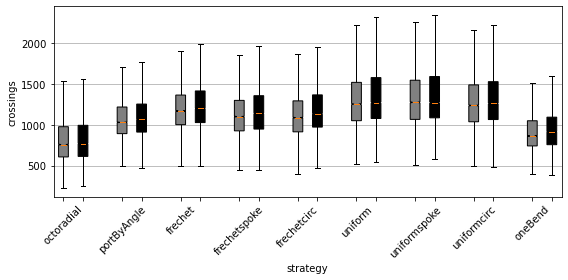

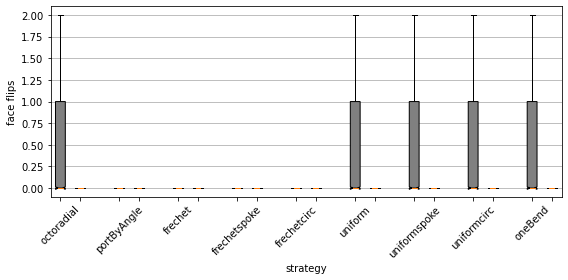

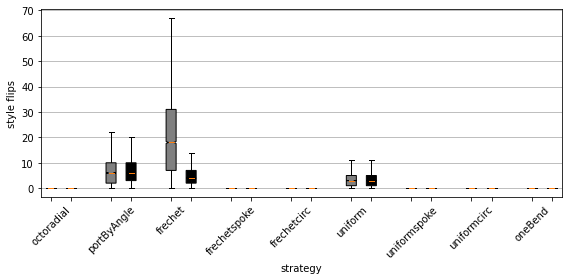

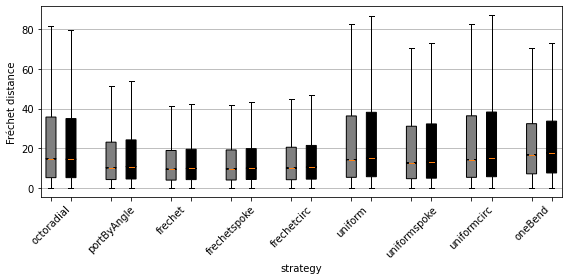

In [18]:
boxplotparameter("allcrossings","crossings","Crossings")
boxplotparameter("faceflips","face flips","Number of face flips")
boxplotparameter("styleflips","style flips","Number of style flips")
boxplotparameter("alldistances","Fréchet distance","Fréchet Distances")


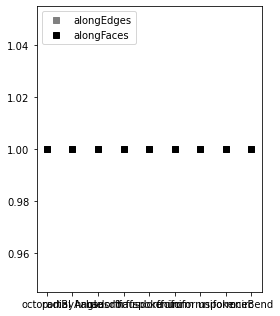

In [21]:
#construct a dummy legend for the colors:
plt.figure(figsize=[4,4.5])
for j in range(len(benchmarks)):
    benchmark = benchmarks[j]
    symbol = benchmarksymbols[j]
    color = thecolors[j]
    variableList =[]
    for strategy in strategies:
            variableList.append(1)
    plt.plot(strategies, variableList, 's', color=color, label=benchmark)
plt.legend(loc='upper left');
#plt.grid()
plt.tight_layout()
plt.savefig("PLOTS/Random_legend.pdf")

In [7]:
print(random_allcrossings[0]['octoradial_Randomgraph000_alongFaces'])

[922.0, 916.5, 914.0, 895.5, 857.0, 808.5, 821.0, 783.5, 847.5, 841.5, 830.0, 816.5, 814.0, 851.5, 836.0, 798.0, 742.0, 671.0, 654.0, 692.5, 697.0, 713.5, 792.0, 784.5, 753.5, 815.0, 745.0, 758.5, 787.5, 814.0, 755.5, 748.0, 753.5, 755.0, 774.0, 747.0, 733.0, 719.5, 792.0, 774.5, 722.0, 728.5, 744.5, 766.0, 768.5, 709.5, 701.0, 710.0, 717.5, 708.0, 707.0, 704.5, 717.5, 709.0, 716.0, 700.5, 696.0, 760.0, 755.5, 749.5, 752.0, 763.5, 760.0, 751.0, 754.0, 758.5, 760.0, 746.0, 766.0, 758.0, 769.0, 764.0, 699.5, 710.0, 707.0, 720.5, 713.0, 715.0, 689.0, 707.5, 704.0, 694.5, 684.0, 670.0, 673.5, 677.0, 699.0, 703.5, 682.0, 675.0, 689.0, 711.0, 762.5, 770.0, 755.0, 749.5, 741.0, 778.0, 764.0, 760.0, 732.0]
